In [1]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# machine learning stack
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

In [2]:
titanic = pd.read_csv('../week02/data/train.csv')

STEP1: Spliting the titanic full data 

In [3]:


#Different menthod of doing Train-Test split
train,test = train_test_split(titanic, test_size=0.2, random_state=42) 
#to drop old index after spliting and start with new index
train.reset_index(drop=True, inplace=True) 
test.reset_index(drop=True, inplace=True)

2. EXPLORING DATA ANALYSIS

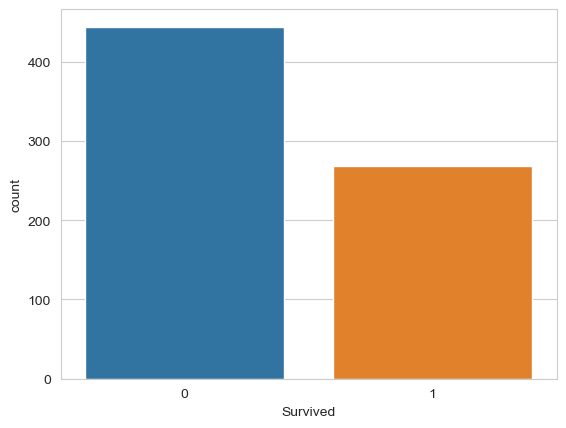

In [4]:
#Step1: Calculate the number of surviving/non-surviving passengers and display it as a bar plot.
sns.countplot(data=train, x='Survived');

In [5]:
#Step2: Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.
#calculate sum of total first class passengers

Pclass_all=(train['Pclass']==1).sum()
total_sur = ((train['Survived'] == 1) & (train['Pclass']==1)).sum()
total_sur/Pclass_all

0.6073619631901841

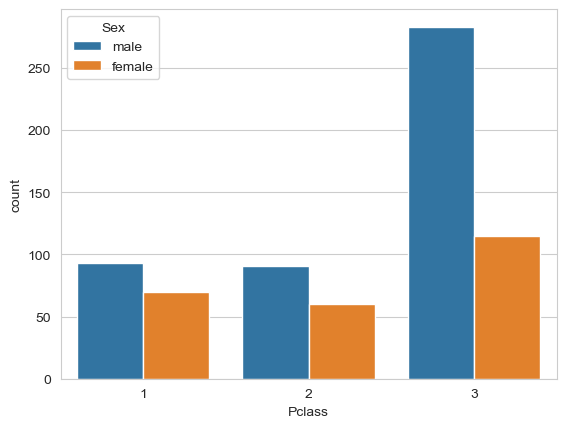

In [6]:
#Step3: Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.
sns.countplot(
    data=train,
    x='Pclass',
    hue='Sex'
);

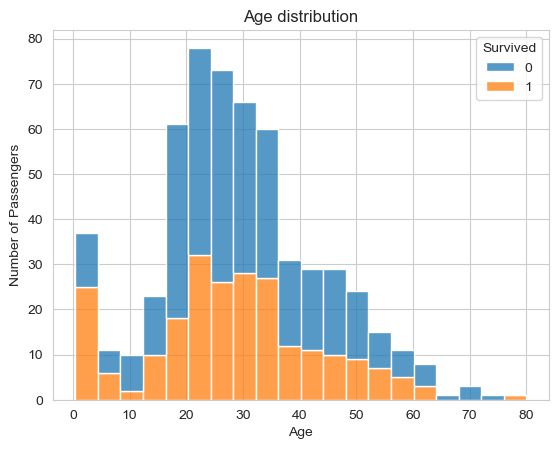

In [7]:
#Step4: Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

sns.histplot(data=train,
             x= 'Age',
             hue= 'Survived',
             multiple='stack'
            )
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age distribution');

In [8]:
#Step5: Calculate the average age for survived and drowned passengers separately.

avg_age_survived = train[train['Survived']==1]['Age'].mean()
avg_age_survived

28.45189655172414

In [9]:
avg_age_drowned = train[train['Survived']==0]['Age'].mean()
avg_age_drowned

30.21323529411765

In [10]:
#Step6: Replace missing age values by the mean age.
# x referes to particular column in data. (\ is line break). axis = 1 is work column wise

mean_age = train.groupby(['Pclass', 'Sex'])['Age'].mean()
train['Age'] = train.apply( lambda x: 
                               mean_age[x['Pclass']][x['Sex']]
                               if x['Age']!=x['Age'] else x['Age'],
                               axis=1
)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,332,0,1,"Partner, Mr. Austen",male,45.500000,0,0,113043,28.5000,C124,S
1,734,0,2,"Berriman, Mr. William John",male,23.000000,0,0,28425,13.0000,NaN,S
2,383,0,3,"Tikkanen, Mr. Juho",male,32.000000,0,0,STON/O 2. 3101293,7.9250,NaN,S
3,705,0,3,"Hansen, Mr. Henrik Juul",male,26.000000,1,0,350025,7.8542,NaN,S
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.000000,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
707,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.000000,0,0,343120,7.6500,NaN,S
708,271,0,1,"Cairns, Mr. Alexander",male,40.558158,0,0,113798,31.0000,NaN,S
709,861,0,3,"Hansen, Mr. Claus Peter",male,41.000000,2,0,350026,14.1083,NaN,S
710,436,1,1,"Carter, Miss. Lucile Polk",female,14.000000,1,2,113760,120.0000,B96 B98,S


In [11]:
#STEP7: Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

train[['Pclass', 'Survived', 'Sex']]

,Pclass,Survived,Sex
0,1,0,male
1,2,0,male
2,3,0,male
3,3,0,male
4,3,0,female
...,...,...,...
707,3,1,female
708,1,0,male
709,3,0,male
710,1,1,female


STEP4: Feature Engineering on Train Data

In [12]:
encoding_sex = pd.get_dummies(
    data=train['Sex'],
    drop_first=True
)
train['Sex'] = encoding_sex
train #male = 1, female = 0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,332,0,1,"Partner, Mr. Austen",1,45.500000,0,0,113043,28.5000,C124,S
1,734,0,2,"Berriman, Mr. William John",1,23.000000,0,0,28425,13.0000,NaN,S
2,383,0,3,"Tikkanen, Mr. Juho",1,32.000000,0,0,STON/O 2. 3101293,7.9250,NaN,S
3,705,0,3,"Hansen, Mr. Henrik Juul",1,26.000000,1,0,350025,7.8542,NaN,S
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",0,6.000000,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
707,107,1,3,"Salkjelsvik, Miss. Anna Kristine",0,21.000000,0,0,343120,7.6500,NaN,S
708,271,0,1,"Cairns, Mr. Alexander",1,40.558158,0,0,113798,31.0000,NaN,S
709,861,0,3,"Hansen, Mr. Claus Peter",1,41.000000,2,0,350026,14.1083,NaN,S
710,436,1,1,"Carter, Miss. Lucile Polk",0,14.000000,1,2,113760,120.0000,B96 B98,S


In [13]:
#create a feature named Title

train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].lower().strip()) 
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,332,0,1,"Partner, Mr. Austen",1,45.500000,0,0,113043,28.5000,C124,S,mr
1,734,0,2,"Berriman, Mr. William John",1,23.000000,0,0,28425,13.0000,NaN,S,mr
2,383,0,3,"Tikkanen, Mr. Juho",1,32.000000,0,0,STON/O 2. 3101293,7.9250,NaN,S,mr
3,705,0,3,"Hansen, Mr. Henrik Juul",1,26.000000,1,0,350025,7.8542,NaN,S,mr
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",0,6.000000,4,2,347082,31.2750,NaN,S,miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,107,1,3,"Salkjelsvik, Miss. Anna Kristine",0,21.000000,0,0,343120,7.6500,NaN,S,miss
708,271,0,1,"Cairns, Mr. Alexander",1,40.558158,0,0,113798,31.0000,NaN,S,mr
709,861,0,3,"Hansen, Mr. Claus Peter",1,41.000000,2,0,350026,14.1083,NaN,S,mr
710,436,1,1,"Carter, Miss. Lucile Polk",0,14.000000,1,2,113760,120.0000,B96 B98,S,miss


In [14]:
#finding list of unique titles
train['Title'].value_counts()

mr              419
miss            143
mrs              96
master           33
rev               5
dr                5
major             2
col               2
mlle              2
capt              1
mme               1
ms                1
the countess      1
lady              1
Name: Title, dtype: int64

In [15]:
# write a function that does the following transformations:
## ['mrs','mr','miss','master','dr','rev'] remain the same
## ['mlle','ms'] become 'miss'
## 'mme' becomes 'mrs'
## ['col','major','capt'] become 'army'
## ['don','lady','the countess','sir','the count','madam','lord'] become 'nobl'
## other titles become 'unknown'
def transform_title(title):
    if title in ['mrs','mr','miss','master','dr','rev']:
          return title
    elif title in ['mlle','ms']:
          return 'miss'
    elif title == 'mme':
          return 'mrs'
    elif title in ['col','major','capt']:
          return 'army'
    elif title in ['don','lady','the countess','sir','the count','madam','lord']:
          return 'nobl'
    else:
          return 'unknown'

In [16]:
# use .apply() method for binning the title column


train['Title'] = train['Title'].apply(transform_title)
train['Title']

0        mr
1        mr
2        mr
3        mr
4      miss
       ... 
707    miss
708      mr
709      mr
710    miss
711      mr
Name: Title, Length: 712, dtype: object

In [17]:
#replacing misisng value in Embarked column
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
train['Embarked'].value_counts()

S    525
C    125
Q     60
Name: Embarked, dtype: int64

In [19]:
#using most frequent value
most_frequent = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(most_frequent)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,332,0,1,"Partner, Mr. Austen",1,45.500000,0,0,113043,28.5000,C124,S,mr
1,734,0,2,"Berriman, Mr. William John",1,23.000000,0,0,28425,13.0000,NaN,S,mr
2,383,0,3,"Tikkanen, Mr. Juho",1,32.000000,0,0,STON/O 2. 3101293,7.9250,NaN,S,mr
3,705,0,3,"Hansen, Mr. Henrik Juul",1,26.000000,1,0,350025,7.8542,NaN,S,mr
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",0,6.000000,4,2,347082,31.2750,NaN,S,miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,107,1,3,"Salkjelsvik, Miss. Anna Kristine",0,21.000000,0,0,343120,7.6500,NaN,S,miss
708,271,0,1,"Cairns, Mr. Alexander",1,40.558158,0,0,113798,31.0000,NaN,S,mr
709,861,0,3,"Hansen, Mr. Claus Peter",1,41.000000,2,0,350026,14.1083,NaN,S,mr
710,436,1,1,"Carter, Miss. Lucile Polk",0,14.000000,1,2,113760,120.0000,B96 B98,S,miss


In [20]:
#replacing missing values in Cabin
train['Cabin'] = train.apply(
    lambda x: 0\
    if x['Cabin']!=x['Cabin']\
    else 1,
    axis=1
)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,332,0,1,"Partner, Mr. Austen",1,45.500000,0,0,113043,28.5000,1,S,mr
1,734,0,2,"Berriman, Mr. William John",1,23.000000,0,0,28425,13.0000,0,S,mr
2,383,0,3,"Tikkanen, Mr. Juho",1,32.000000,0,0,STON/O 2. 3101293,7.9250,0,S,mr
3,705,0,3,"Hansen, Mr. Henrik Juul",1,26.000000,1,0,350025,7.8542,0,S,mr
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",0,6.000000,4,2,347082,31.2750,0,S,miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,107,1,3,"Salkjelsvik, Miss. Anna Kristine",0,21.000000,0,0,343120,7.6500,0,S,miss
708,271,0,1,"Cairns, Mr. Alexander",1,40.558158,0,0,113798,31.0000,0,S,mr
709,861,0,3,"Hansen, Mr. Claus Peter",1,41.000000,2,0,350026,14.1083,0,S,mr
710,436,1,1,"Carter, Miss. Lucile Polk",0,14.000000,1,2,113760,120.0000,1,S,miss


In [21]:
#Engineering for Fare price

train['Fare'] = train.apply(
          lambda x: 
          x['Fare']/(x['SibSp']+x['Parch']+1),
axis=1
)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,332,0,1,"Partner, Mr. Austen",1,45.500000,0,0,113043,28.500000,1,S,mr
1,734,0,2,"Berriman, Mr. William John",1,23.000000,0,0,28425,13.000000,0,S,mr
2,383,0,3,"Tikkanen, Mr. Juho",1,32.000000,0,0,STON/O 2. 3101293,7.925000,0,S,mr
3,705,0,3,"Hansen, Mr. Henrik Juul",1,26.000000,1,0,350025,3.927100,0,S,mr
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",0,6.000000,4,2,347082,4.467857,0,S,miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,107,1,3,"Salkjelsvik, Miss. Anna Kristine",0,21.000000,0,0,343120,7.650000,0,S,miss
708,271,0,1,"Cairns, Mr. Alexander",1,40.558158,0,0,113798,31.000000,0,S,mr
709,861,0,3,"Hansen, Mr. Claus Peter",1,41.000000,2,0,350026,4.702767,0,S,mr
710,436,1,1,"Carter, Miss. Lucile Polk",0,14.000000,1,2,113760,30.000000,1,S,miss


CATEGORICAL ENCODING - Embarked, Title, 

In [22]:
encoding_sex = pd.get_dummies(
    data=train['Sex'],
    drop_first=True
)
train['Sex'] = encoding_sex
train #male = 1, female = 0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,332,0,1,"Partner, Mr. Austen",1,45.500000,0,0,113043,28.500000,1,S,mr
1,734,0,2,"Berriman, Mr. William John",1,23.000000,0,0,28425,13.000000,0,S,mr
2,383,0,3,"Tikkanen, Mr. Juho",1,32.000000,0,0,STON/O 2. 3101293,7.925000,0,S,mr
3,705,0,3,"Hansen, Mr. Henrik Juul",1,26.000000,1,0,350025,3.927100,0,S,mr
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",0,6.000000,4,2,347082,4.467857,0,S,miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,107,1,3,"Salkjelsvik, Miss. Anna Kristine",0,21.000000,0,0,343120,7.650000,0,S,miss
708,271,0,1,"Cairns, Mr. Alexander",1,40.558158,0,0,113798,31.000000,0,S,mr
709,861,0,3,"Hansen, Mr. Claus Peter",1,41.000000,2,0,350026,4.702767,0,S,mr
710,436,1,1,"Carter, Miss. Lucile Polk",0,14.000000,1,2,113760,30.000000,1,S,miss


In [23]:
#Encoding for Embarked

train['Embarked'].value_counts()

S    527
C    125
Q     60
Name: Embarked, dtype: int64

In [24]:
def encoding_embarked(embarked):
    if embarked == 'S':
        embarked = 1
    elif embarked == 'C':
        embarked = 2
    elif embarked == 'Q':
        embarked = 3
    return embarked

train['Embarked'] = train['Embarked'].apply(encoding_embarked)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,332,0,1,"Partner, Mr. Austen",1,45.500000,0,0,113043,28.500000,1,1,mr
1,734,0,2,"Berriman, Mr. William John",1,23.000000,0,0,28425,13.000000,0,1,mr
2,383,0,3,"Tikkanen, Mr. Juho",1,32.000000,0,0,STON/O 2. 3101293,7.925000,0,1,mr
3,705,0,3,"Hansen, Mr. Henrik Juul",1,26.000000,1,0,350025,3.927100,0,1,mr
4,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",0,6.000000,4,2,347082,4.467857,0,1,miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,107,1,3,"Salkjelsvik, Miss. Anna Kristine",0,21.000000,0,0,343120,7.650000,0,1,miss
708,271,0,1,"Cairns, Mr. Alexander",1,40.558158,0,0,113798,31.000000,0,1,mr
709,861,0,3,"Hansen, Mr. Claus Peter",1,41.000000,2,0,350026,4.702767,0,1,mr
710,436,1,1,"Carter, Miss. Lucile Polk",0,14.000000,1,2,113760,30.000000,1,1,miss


In [25]:
#Encoding for title

def encoding_title(title):
    if title in ['mrs','mr','miss','master','dr','rev']:
        title = 1
    elif title in ['army']:
        title = 2
    elif title in ['nobl']:
        title = 3
    else:
        title = 4
    return title

In [26]:
train['Title'] = train['Title'].apply(encoding_title)

In [27]:
train['Title'].value_counts()

1    705
2      5
3      2
Name: Title, dtype: int64

In [28]:
train = train.drop(['Name', 'Ticket','Cabin'], axis=1)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,332,0,1,1,45.500000,0,0,28.500000,1,1
1,734,0,2,1,23.000000,0,0,13.000000,1,1
2,383,0,3,1,32.000000,0,0,7.925000,1,1
3,705,0,3,1,26.000000,1,0,3.927100,1,1
4,814,0,3,0,6.000000,4,2,4.467857,1,1
...,...,...,...,...,...,...,...,...,...,...
707,107,1,3,0,21.000000,0,0,7.650000,1,1
708,271,0,1,1,40.558158,0,0,31.000000,1,1
709,861,0,3,1,41.000000,2,0,4.702767,1,1
710,436,1,1,0,14.000000,1,2,30.000000,1,1


SCALING NUMERICAL FEATURES

In [29]:
scaler = StandardScaler()
scaling_features = train[['Fare','Age']]
train[['Fare','Age']] = scaler.fit_transform(scaling_features)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,332,0,1,1,1.237065,0,0,0.219382,1,1
1,734,0,2,1,-0.461742,0,0,-0.186936,1,1
2,383,0,3,1,0.217781,0,0,-0.319973,1,1
3,705,0,3,1,-0.235234,1,0,-0.424774,1,1
4,814,0,3,0,-1.745284,4,2,-0.410599,1,1
...,...,...,...,...,...,...,...,...,...,...
707,107,1,3,0,-0.612747,0,0,-0.327182,1,1
708,271,0,1,1,0.863943,0,0,0.284917,1,1
709,861,0,3,1,0.897304,2,0,-0.404441,1,1
710,436,1,1,0,-1.141264,1,2,0.258703,1,1


Building mode 1 : Defining feature and target

In [30]:
# feature
X_train = train.drop('Survived', axis=1)
#target
y_train = train['Survived']

In [31]:
X_train.shape, y_train.shape

((712, 9), (712,))

In [32]:
y_train.value_counts(normalize=True)

0    0.623596
1    0.376404
Name: Survived, dtype: float64

In [33]:
# instatiate the model = classifier
model = LogisticRegression()

In [34]:
# train the model
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# our coefficients = w0,w1
model.coef_, model.intercept_

(array([[ 4.17615300e-04, -9.54636636e-01, -2.52987975e+00,
         -4.75050736e-01, -3.02441284e-01, -5.28715430e-02,
          1.94931834e-01,  2.20739654e-01,  1.44807178e+00]]),
 array([1.43880183]))

In [36]:
#Evaluationg the model
# score on the training data
model.score(X_train, y_train)

0.8075842696629213

In [37]:
model.predict_proba(X_train)

array([[0.68636053, 0.31363947],
       [0.69890715, 0.30109285],
       [0.90821728, 0.09178272],
       ...,
       [0.95420027, 0.04579973],
       [0.07450514, 0.92549486],
       [0.50026895, 0.49973105]])

FEATURE ENGINEERING ON TEST DATA

In [38]:
mean_age = test.groupby(['Pclass', 'Sex'])['Age'].mean()
test['Age'] = test.apply( lambda x: 
                               mean_age[x['Pclass']][x['Sex']]
                               if x['Age']!=x['Age'] else x['Age'],
                               axis=1
)
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,25.925532,1,1,2661,15.2458,NaN,C
1,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,NaN,S
2,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,S
3,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,NaN,S
4,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
174,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.000000,0,0,STON/O 2. 3101274,7.1250,NaN,S
175,774,0,3,"Elias, Mr. Dibo",male,25.925532,0,0,2674,7.2250,NaN,C
176,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.000000,1,5,347077,31.3875,NaN,S
177,85,1,2,"Ilett, Miss. Bertha",female,17.000000,0,0,SO/C 14885,10.5000,NaN,S


In [39]:
#create a feature named Title

test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].lower().strip()) 
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,25.925532,1,1,2661,15.2458,NaN,C,master
1,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,NaN,S,mr
2,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,S,mr
3,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,NaN,S,miss
4,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.000000,0,0,STON/O 2. 3101274,7.1250,NaN,S,mr
175,774,0,3,"Elias, Mr. Dibo",male,25.925532,0,0,2674,7.2250,NaN,C,mr
176,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.000000,1,5,347077,31.3875,NaN,S,mrs
177,85,1,2,"Ilett, Miss. Bertha",female,17.000000,0,0,SO/C 14885,10.5000,NaN,S,miss


In [40]:
#finding list of unique titles
test['Title'].value_counts()

mr          98
miss        39
mrs         29
master       7
dr           2
rev          1
don          1
jonkheer     1
sir          1
Name: Title, dtype: int64

In [41]:
# write a function that does the following transformations:
## ['mrs','mr','miss','master','dr','rev'] remain the same
## ['mlle','ms'] become 'miss'
## 'mme' becomes 'mrs'
## ['col','major','capt'] become 'army'
## ['don','lady','the countess','sir','the count','madam','lord'] become 'nobl'
## other titles become 'unknown'
def transform_title(title):
    if title in ['mrs','mr','miss','master','dr','rev']:
          return title
    elif title in ['mlle','ms']:
          return 'miss'
    elif title == 'mme':
          return 'mrs'
    elif title in ['col','major','capt']:
          return 'army'
    elif title in ['don','lady','the countess','sir','the count','madam','lord']:
          return 'nobl'
    else:
          return 'unknown'

In [42]:
# use .apply() method for binning the title column


test['Title'] = test['Title'].apply(transform_title)
test['Title']

0      master
1          mr
2          mr
3        miss
4        miss
        ...  
174        mr
175        mr
176       mrs
177      miss
178      miss
Name: Title, Length: 179, dtype: object

In [43]:
#replacing misisng value in Embarked column
test['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [44]:
def encoding_embarked(embarked):
    if embarked == 'S':
        embarked = 1
    elif embarked == 'C':
        embarked = 2
    elif embarked == 'Q':
        embarked = 3
    return embarked

test['Embarked'] = test['Embarked'].apply(encoding_embarked)
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,25.925532,1,1,2661,15.2458,NaN,2,master
1,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,NaN,1,mr
2,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,1,mr
3,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,NaN,1,miss
4,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,2,miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.000000,0,0,STON/O 2. 3101274,7.1250,NaN,1,mr
175,774,0,3,"Elias, Mr. Dibo",male,25.925532,0,0,2674,7.2250,NaN,2,mr
176,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.000000,1,5,347077,31.3875,NaN,1,mrs
177,85,1,2,"Ilett, Miss. Bertha",female,17.000000,0,0,SO/C 14885,10.5000,NaN,1,miss


In [45]:
#replacing missing values in Cabin
test['Cabin'] = test.apply(
    lambda x: 0\
    if x['Cabin']!=x['Cabin']\
    else 1,
    axis=1
)
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,25.925532,1,1,2661,15.2458,0,2,master
1,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,0,1,mr
2,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,0,1,mr
3,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,0,1,miss
4,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,0,2,miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.000000,0,0,STON/O 2. 3101274,7.1250,0,1,mr
175,774,0,3,"Elias, Mr. Dibo",male,25.925532,0,0,2674,7.2250,0,2,mr
176,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.000000,1,5,347077,31.3875,0,1,mrs
177,85,1,2,"Ilett, Miss. Bertha",female,17.000000,0,0,SO/C 14885,10.5000,0,1,miss


In [46]:
#Engineering for Fare price

test['Fare'] = test.apply(
          lambda x: 
          x['Fare']/(x['SibSp']+x['Parch']+1),
axis=1
)
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,25.925532,1,1,2661,5.081933,0,2,master
1,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.500000,0,1,mr
2,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.925000,0,1,mr
3,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,16.500000,0,1,miss
4,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,5.620850,0,2,miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.000000,0,0,STON/O 2. 3101274,7.125000,0,1,mr
175,774,0,3,"Elias, Mr. Dibo",male,25.925532,0,0,2674,7.225000,0,2,mr
176,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.000000,1,5,347077,4.483929,0,1,mrs
177,85,1,2,"Ilett, Miss. Bertha",female,17.000000,0,0,SO/C 14885,10.500000,0,1,miss


SCALING NUMERICAL FEATURES on Test data

In [47]:
scaler = StandardScaler()
scaling_features = test[['Fare','Age']]
test[['Fare','Age']] = scaler.fit_transform(scaling_features)
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,-0.311859,1,1,2661,-0.571790,0,2,master
1,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,0.068522,0,0,C.A. 18723,-0.350191,0,1,mr
2,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,-0.756035,0,0,SOTON/O2 3101287,-0.455508,0,1,mr
3,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,-1.805470,0,1,248727,-0.104791,0,1,miss
4,40,1,3,"Nicola-Yarred, Miss. Jamila",female,-1.205793,1,0,2651,-0.549748,0,2,miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,434,0,3,"Kallio, Mr. Nikolai Erland",male,-0.980914,0,0,STON/O 2. 3101274,-0.488228,0,1,mr
175,774,0,3,"Elias, Mr. Dibo",male,-0.311859,0,0,2674,-0.484138,0,2,mr
176,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,0.593240,1,5,347077,-0.596248,0,1,mrs
177,85,1,2,"Ilett, Miss. Bertha",female,-0.980914,0,0,SO/C 14885,-0.350191,0,1,miss


Categorical Engoding for test data

In [48]:
encoding_sex_test = pd.get_dummies(
    data=test['Sex'],
    drop_first=True
)
test['Sex'] = encoding_sex_test

In [49]:
test['Title'] = test['Title'].apply(encoding_title)

In [50]:
test['Embarked'] = test['Embarked'].apply(encoding_embarked)

In [51]:
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,710,1,3,1,-0.311859,1,1,-0.571790,2,1
1,440,0,2,1,0.068522,0,0,-0.350191,1,1
2,841,0,3,1,-0.756035,0,0,-0.455508,1,1
3,721,1,2,0,-1.805470,0,1,-0.104791,1,1
4,40,1,3,0,-1.205793,1,0,-0.549748,2,1
...,...,...,...,...,...,...,...,...,...,...
174,434,0,3,1,-0.980914,0,0,-0.488228,1,1
175,774,0,3,1,-0.311859,0,0,-0.484138,2,1
176,26,1,3,0,0.593240,1,5,-0.596248,1,1
177,85,1,2,0,-0.980914,0,0,-0.350191,1,1


Building mode 1 : Defining feature and target on test data

In [52]:
# feature
X_test = test.drop('Survived', axis=1)
#target
y_test = test['Survived']

In [53]:
test_acccuracy = model.score(X_test,y_test)
print(f"test accuracy: {round(test_acccuracy, 6)}")

test accuracy: 0.804469


Kaggel Test data EDA

In [54]:
kaggel_test = pd.read_csv('../week02/data/test.csv')
kaggel_test.reset_index(drop=True, inplace=True)
kaggel_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [55]:
kaggel_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [56]:
mean_age = kaggel_test.groupby(['Pclass', 'Sex'])['Age'].mean()
kaggel_test['Age'] = kaggel_test.apply( lambda x: 
                               mean_age[x['Pclass']][x['Sex']]
                               if x['Age']!=x['Age'] else x['Age'],
                               axis=1
)
kaggel_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.525104,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,24.525104,0,0,359309,8.0500,NaN,S


In [57]:
#create a feature named Title

kaggel_test['Title'] = kaggel_test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].lower().strip()) 
kaggel_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,mr
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.525104,0,0,A.5. 3236,8.0500,NaN,S,mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,mr
416,1308,3,"Ware, Mr. Frederick",male,24.525104,0,0,359309,8.0500,NaN,S,mr


In [58]:
#finding list of unique titles
kaggel_test['Title'].value_counts()

mr        240
miss       78
mrs        72
master     21
col         2
rev         2
ms          1
dr          1
dona        1
Name: Title, dtype: int64

In [59]:
# write a function that does the following transformations:
## ['mrs','mr','miss','master','dr','rev'] remain the same
## ['mlle','ms'] become 'miss'
## 'mme' becomes 'mrs'
## ['col','major','capt'] become 'army'
## ['don','lady','the countess','sir','the count','madam','lord'] become 'nobl'
## other titles become 'unknown'
def transform_title(title):
    if title in ['mrs','mr','miss','master','dr','rev']:
          return title
    elif title in ['mlle','ms']:
          return 'miss'
    elif title == 'mme':
          return 'mrs'
    elif title in ['col','major','capt']:
          return 'army'
    elif title in ['don','lady','the countess','sir','the count','madam','lord']:
          return 'nobl'
    else:
          return 'unknown'

In [60]:
# use .apply() method for binning the title column

kaggel_test['Title'] = kaggel_test['Title'].apply(transform_title)
kaggel_test['Title']


0           mr
1          mrs
2           mr
3           mr
4          mrs
        ...   
413         mr
414    unknown
415         mr
416         mr
417     master
Name: Title, Length: 418, dtype: object

In [61]:
#replacing misisng value in Embarked column
kaggel_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [62]:
def encoding_embarked(embarked):
    if embarked == 'S':
        embarked = 1
    elif embarked == 'C':
        embarked = 2
    elif embarked == 'Q':
        embarked = 3
    return embarked

kaggel_test['Embarked'] = kaggel_test['Embarked'].apply(encoding_embarked)
kaggel_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,3,mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,1,mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,3,mr
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,1,mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,1,mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.525104,0,0,A.5. 3236,8.0500,NaN,1,mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,2,unknown
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,mr
416,1308,3,"Ware, Mr. Frederick",male,24.525104,0,0,359309,8.0500,NaN,1,mr


In [63]:
#replacing missing values in Cabin
kaggel_test['Cabin'] = kaggel_test.apply(
    lambda x: 0\
    if x['Cabin']!=x['Cabin']\
    else 1,
    axis=1
)
kaggel_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,0,3,mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,0,1,mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,0,3,mr
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,0,1,mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,0,1,mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.525104,0,0,A.5. 3236,8.0500,0,1,mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,1,2,unknown
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,0,1,mr
416,1308,3,"Ware, Mr. Frederick",male,24.525104,0,0,359309,8.0500,0,1,mr


In [64]:
#Engineering for Fare price
kaggel_test['Fare'] = kaggel_test.apply(lambda x: x['Fare']/(x['SibSp']+x['Parch']+1),axis=1)

mean_fare_price = round(kaggel_test.groupby(['Pclass'])['Fare'].mean(),1)
mean_fare_price

kaggel_test['Fare'] = kaggel_test.apply(
    lambda x: mean_fare_price[x['Pclass']] 
    if x['Fare']!=x['Fare'] 
    else x['Fare'],
    axis=1
)


In [65]:
kaggel_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

Categorical Encoding

In [66]:
#Encoding - sex,title, embarked

encoding_sex = pd.get_dummies(
    data=kaggel_test['Sex'],
    drop_first=True
)
kaggel_test['Sex'] = encoding_sex

In [67]:
kaggel_test['Title'] = kaggel_test['Title'].apply(encoding_title)

In [68]:
kaggel_test['Embarked'] = kaggel_test['Embarked'].apply(encoding_embarked)

In [69]:
#Dropped unwanted columns
kaggel_test = kaggel_test.drop(['Name', 'Ticket','Cabin'], axis=1)

SCALING NUMERICAL FEATURES on kaggel test data

In [70]:
scaler = StandardScaler()
scaling_features = kaggel_test[['Fare','Age']]
kaggel_test[['Fare','Age']] = scaler.fit_transform(scaling_features)
kaggel_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,0.392121,0,0,-0.392036,3,1
1,893,3,0,1.357557,1,0,-0.513776,1,1
2,894,2,1,2.516080,0,0,-0.339779,3,1
3,895,3,1,-0.187140,0,0,-0.368603,1,1
4,896,3,0,-0.573315,1,1,-0.497021,1,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,-0.378289,0,0,-0.385827,1,1
414,1306,1,0,0.739678,0,0,2.450139,2,4
415,1307,3,1,0.701061,0,0,-0.408323,1,1
416,1308,3,1,-0.378289,0,0,-0.385827,1,1


Transforming the data for kaggel test

In [71]:
X_kag = kaggel_test
X_kag

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,0.392121,0,0,-0.392036,3,1
1,893,3,0,1.357557,1,0,-0.513776,1,1
2,894,2,1,2.516080,0,0,-0.339779,3,1
3,895,3,1,-0.187140,0,0,-0.368603,1,1
4,896,3,0,-0.573315,1,1,-0.497021,1,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,-0.378289,0,0,-0.385827,1,1
414,1306,1,0,0.739678,0,0,2.450139,2,4
415,1307,3,1,0.701061,0,0,-0.408323,1,1
416,1308,3,1,-0.378289,0,0,-0.385827,1,1


In [72]:
y_kag_pred = model.predict(X_kag)

In [73]:
#kaggel_test = kaggel_test.reset_index()

In [74]:
output = pd.DataFrame([{'PassengerId': kaggel_test.PassengerId,'Survived': y_kag_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [75]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
